<a href="https://colab.research.google.com/github/macorony/NeuralNetwork/blob/main/Convolution_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is convolution
Convolution is a mathematical operation that combines two functions to describe the overlap between them. Convolution takes two functions and slides one of them over the other, multiplying the function values at each point where they overlap, and adding up the products to create a new function.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img1 = np.array([np.array([200, 200]), np.array([200, 200])])
img2 = np.array([np.array([200, 200]), np.array([0, 0])])
img3 = np.array([np.array([200, 0]), np.array([200, 0])])

kernel_horizontal = np.array([np.array([2,2]), np.array([-2,-2])])
kernel_vertical = np.array([np.array([2,-2]), np.array([2,-2])])

In [ ]:
def apply_kernel(img, kernel):
  return np.sum(np.multiply(img1, kernel))


[[200 200]
 [200 200]]


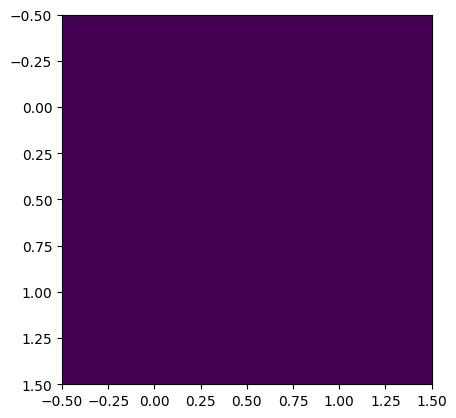

[[200 200]
 [  0   0]]


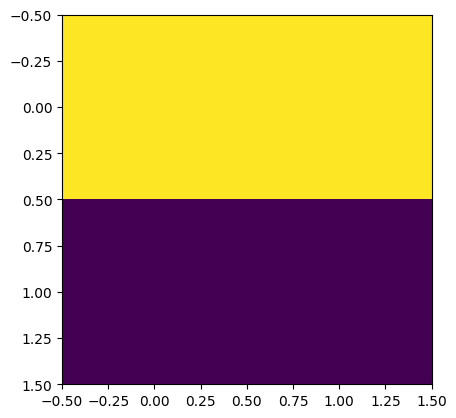

[[200   0]
 [200   0]]


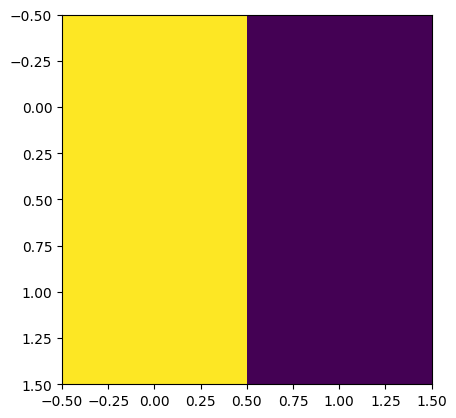

In [ ]:
for img in [img1, img2, img3]:
  print(img)
  plt.imshow(img)
  plt.show()

In [ ]:
for img in [img1, img2, img3]:
  print(img)
  for kernel in [kernel_horizontal, kernel_horizontal]:
    print(kernel)
    out = apply_kernel(img, kernel)
    print(out)


[[200 200]
 [200 200]]
[[ 2  2]
 [-2 -2]]
0
[[ 2  2]
 [-2 -2]]
0
[[200 200]
 [  0   0]]
[[ 2  2]
 [-2 -2]]
0
[[ 2  2]
 [-2 -2]]
0
[[200   0]
 [200   0]]
[[ 2  2]
 [-2 -2]]
0
[[ 2  2]
 [-2 -2]]
0


## Convolution from scratch

credit resouce: https://github.com/detkov/Convolution-From-Scratch/tree/main

In [ ]:
import pandas as pd
import numpy as np
import imageio
import matplotlib.pyplot as plt

In [ ]:
from typing import List, Tuple, Union

In [ ]:
def add_padding(matrix: np.ndarray, padding: Tuple[int, int]) -> np.ndarray:
  n, m = matrix.shape
  r, c = padding
  padded_matrix = np.zeros((n + r * 2, m + c * 2))
  padded_matrix[r: n + r, c: m +c] = matrix
  return padded_matrix

def _check_params(matrix, kernel, stride, dilation, padding):
  params_are_correct = (isinstance(stride[0], int) and isinstance(stride[1], int) and
                        isinstance(dilation[0], int) and isinstance(dilation[1], int) and
                        isinstance(padding[0], int) and isinstance(padding[1], int) and
                        stride[0] >= 1 and stride[1] and stride[1] >= 1 and
                        dilation[0] >= 1 and dilation[1] >= 1 and
                        padding[0] >= 0 and padding[1] >=0)
  assert params_are_correct
  if not isinstance(matrix, np.ndarray):
    matrix = np.array(matrix)
  n, m = matrix.shape
  matrix = matrix if list(padding) == [0,0] else add_padding(matrix, padding)
  n_p, m_p = matrix.shape

  if not isinstance(kernel, np.ndarray):
    kernel = np.array(kernel)
  k = kernel.shape

  kernel_is_correct = k[0] % 2 == 1 and k[1] %2 == 1
  assert kernel_is_correct
  matrix_to_kernel_is_correct = n_p >= k[0] and m_p >= k[1]
  assert matrix_to_kernel_is_correct

  h_out = np.floor((n+2*padding[0] - k[0] - (k[0] - 1) * (dilation[0] - 1)) / stride[0]).astype(int) + 1
  w_out = np.floor((m+2*padding[1] - k[1] - (k[1] - 1) * (dilation[1] - 1)) / stride[1]).astype(int) + 1
  out_dimensions_are_correct = h_out > 0 and w_out > 0
  assert out_dimensions_are_correct

  return matrix, kernel, k, h_out, w_out

def conv2d(matrix: Union[List[List[float]], np.ndarray],
           kernel: Union[List[List[float]], np.ndarray],
           stride: Tuple[int, int] = (1,1),
           dilation: Tuple[int, int] = (1,1),
           padding: Tuple[int, int] = (0, 0)) -> np.ndarray:
  matrix, kernel, k, h_out, w_out = _check_params(matrix, kernel, stride, dilation, padding)
  matrix_out = np.zeros((h_out, w_out))

  b = k[0] // 2, k[1] // 2
  center_x_0 = b[0] * dilation[0]
  center_y_0 = b[1] * dilation[1]
  for i in range(h_out):
    center_x = center_y_0 + i * stride[0]
    indices_x = [center_x + l * dilation[0] for l in range(-b[0], b[0] + 1)]
    for j in range(w_out):
      center_y = center_y_0 + j * stride[1]
      indices_y = [center_y + j * dilation[1] for j in range(-b[1], b[1] + 1)]
      submatrix = matrix[indices_x, :][:, indices_y]
      matrix_out[i][j] = np.sum(np.multiply(submatrix, kernel))
  return matrix_out

def apply_filter_to_image(image: np.ndarray,
                          kernel: List[List[float]]) -> np.ndarray:
  kernel = np.asarray(kernel)
  b = kernel.shape
  return np.dstack([conv2d(image[:,:,z], kernel, padding=(b[0]//2, b[1]//2)) for z in range(3)]).astype('uint8')


In [ ]:
gaussian_blur = np.array([
    [1,2,1],
    [2,4,2],
    [1,2,1]
]) / 32

<ipython-input-95-209ca0f6ec47>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread("/content/drive/MyDrive/file_transmission/pic.jpg")


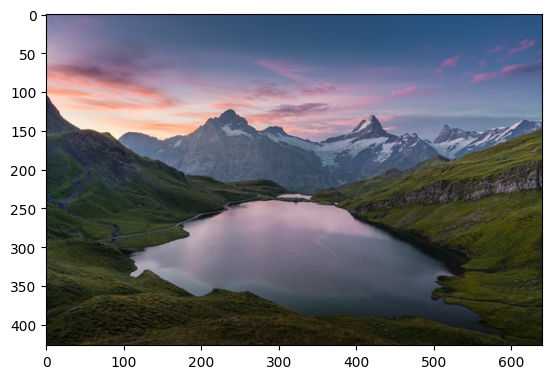

In [ ]:
image = imageio.imread("/content/drive/MyDrive/file_transmission/pic.jpg")
plt.imshow(image)

In [ ]:
filtered_image = apply_filter_to_image(image, gaussian_blur)

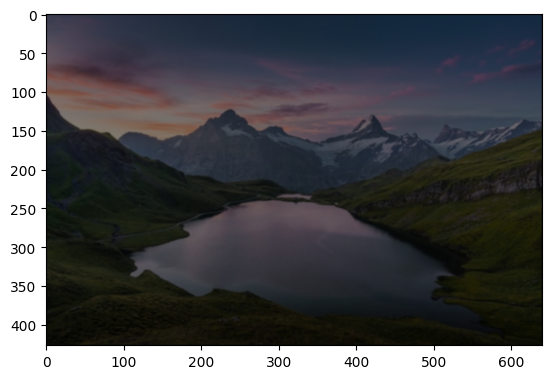

In [ ]:
plt.imshow(filtered_image)